In [1]:
from src.bertopic_pipeline import BERTopicPipeline
import polars as pl
import matplotlib.pyplot as plt
import ruptures as rpt

embedding_models = [
    # 'text-embedding-3-large', 
    # 'all-mpnet-base-v2', 
    'all-MiniLM-L12-v2'
    ]

models = {}
overall_benchmarkings = {}
per_cluster_benchmarkings = {}
for model_name in embedding_models:
    pipeline = BERTopicPipeline(embedding_model_name=model_name)
    pipeline.load_existing_model()
    pipeline.assign_topic_per_doc()
    models[model_name] = pipeline
    topic_quality = pipeline.evaluate_topic_quality(top_n_words=10)
    per_cluster_benchmarkings[model_name] = topic_quality[model_name].pop('per_cluster')
    overall_benchmarkings.update(topic_quality)

c:\Users\povhi\anaconda3\envs\ip\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2025-08-06 16:24:52.674 | INFO     | src.bertopic_pipeline:_load_embedding_data:42 - Loading embedding data for all-MiniLM-L12-v2 from c:/Users/povhi/OneDrive/01_Uni/03_TU Wien/MSc Data Science/09_Interdisciplinary_Project/ECB_Topic_Chronicles/data/embeddings_all-MiniLM-L12-v2.parquet
2025-08-06 16:24:54.252 | INFO     | src.bertopic_pipeline:_load_embedding_data:44 - Loaded 3702 rows of embedding data for all-MiniLM-L12-v2.
2025-08-06 16:24:54.252 | INFO     | src.bertopic_pipeline:_load_embedding_data:45 - Data columns: ['content', 'related_topics', 'id', 'date', 'author', 'title', 'url', 'language', 'type_long', 'tokens', 'chunks', 'chunks_embeddings']
2025-08-06 16:24:57.741 | INFO     | src.bertopic_pipeline:load_existing_model:5

ModuleNotFoundError: No module named 'numba.core.types.old_scalars'

In [3]:
import joblib
m = joblib.load(r"models\all-MiniLM-L12-v2_topic_model.pkl")  # or whatever is failing
print(m.__class__)
print(m.__module__)

ModuleNotFoundError: No module named 'numba.core.types.old_scalars'

In [ ]:
from src.utils import plot_cluster_metrics, interactive_plot_model_metrics, plot_topic_trends
datetime_casting = lambda model_name: models[model_name].data.with_columns([pl.col("date").cast(pl.Datetime("ms")).alias("date")])
for k in models.keys():
    display(models[k].topic_model.get_topic_info().head(10))
    fig = plot_topic_trends(datetime_casting(k), topics_to_show=[0, 1, 2, 3, 4])
    fig.show() 

,Topic,Count,Name,Representation,Representative_Docs
0,-1,61786,-1_spending_credibility_pact_recession,"[spending, credibility, pact, recession, turmo...",[ enter into expansionary policies. The Europe...
1,0,2146,0_climaterelated_emissions_carbon_environmental,"[climaterelated, emissions, carbon, environmen...",[ truly invested in green and sustainable proj...
2,1,1288,1_dr_translation_translation mr_speech dr,"[dr, translation, translation mr, speech dr, m...",[ any questions you may have. Transcript of th...
3,2,999,2_greek_greece_greeces_waiver,"[greek, greece, greeces, waiver, ela, athens, ...",[ The Greek authorities are committed to proce...
4,3,954,3_journal_pp_vol_american review,"[journal, pp, vol, american review, journal ec...","[, Finance and Economics Discussion Series , 2..."
5,4,937,4_statistics_statistical_official statistics_c...,"[statistics, statistical, official statistics,...","[ System – comprising of Eurostat, the Statist..."
6,5,834,5_virus_vaccination_containment_coronavirus,"[virus, vaccination, containment, coronavirus,...",[ and additional fiscal measures are supportin...
7,6,818,6_minutes_communication_press conferences_tran...,"[minutes, communication, press conferences, tr...",[ more about related content Calendars Meeting...
8,7,700,7_nonfinancial corporations_sales securitisati...,"[nonfinancial corporations, sales securitisati...",[ recovery observed since the beginning of 201...
9,8,660,8_sepa_direct debit_sepa direct_debit,"[sepa, direct debit, sepa direct, debit, sepa ...",[ so far in the SEPA process. SEPA progress Th...


In [ ]:
for k in models.keys():
    display(models[k].topic_model.get_topic_info().head(10))

,Topic,Count,Name,Representation,Representative_Docs
0,-1,61786,-1_spending_credibility_pact_recession,"[spending, credibility, pact, recession, turmo...",[ enter into expansionary policies. The Europe...
1,0,2146,0_climaterelated_emissions_carbon_environmental,"[climaterelated, emissions, carbon, environmen...",[ truly invested in green and sustainable proj...
2,1,1288,1_dr_translation_translation mr_speech dr,"[dr, translation, translation mr, speech dr, m...",[ any questions you may have. Transcript of th...
3,2,999,2_greek_greece_greeces_waiver,"[greek, greece, greeces, waiver, ela, athens, ...",[ The Greek authorities are committed to proce...
4,3,954,3_journal_pp_vol_american review,"[journal, pp, vol, american review, journal ec...","[, Finance and Economics Discussion Series , 2..."
5,4,937,4_statistics_statistical_official statistics_c...,"[statistics, statistical, official statistics,...","[ System – comprising of Eurostat, the Statist..."
6,5,834,5_virus_vaccination_containment_coronavirus,"[virus, vaccination, containment, coronavirus,...",[ and additional fiscal measures are supportin...
7,6,818,6_minutes_communication_press conferences_tran...,"[minutes, communication, press conferences, tr...",[ more about related content Calendars Meeting...
8,7,700,7_nonfinancial corporations_sales securitisati...,"[nonfinancial corporations, sales securitisati...",[ recovery observed since the beginning of 201...
9,8,660,8_sepa_direct debit_sepa direct_debit,"[sepa, direct debit, sepa direct, debit, sepa ...",[ so far in the SEPA process. SEPA progress Th...


In [ ]:
df = models['all-MiniLM-L12-v2'].data
df = df.with_columns([pl.col("date").cast(pl.Datetime("ms")).alias("date")]).sort("date")
df = df.with_columns(
    (pl.col("dominant_topic") == 0).alias("topic_eco"))

eco_cnts = (
    df.group_by("date")
      .agg(
          (pl.col("topic_eco").sum()).alias("cnt_topic_eco"))).sort("date")
eco_perc = (
    df.group_by("date")
      .agg(
          (pl.col("topic_eco").sum() / pl.count()).alias("pct_topic_eco"))).sort("date")

eco_df = eco_cnts.join(
    eco_perc, on="date", how="left")

C:\Users\povhi\AppData\Local\Temp\ipykernel_42588\692574933.py:13: DeprecationWarning:

`pl.count()` is deprecated. Please use `pl.len()` instead.
(Deprecated in version 0.20.5)



In [ ]:
TOPIC_COL = "dominant_topic"   # rename if needed
DATE_COL  = "date"
WIN       = "1mo"      # "1d", "3d", "2w", "1mo", …; set to None for calendar-day buckets
SLIDE_STEP = "1d"  


# if WIN is None:                       # per calendar day
#     out = (
#         df2.group_by(DATE_COL)
#            .agg([
#                pl.col("topic_eco").sum().alias("cnt_topic_eco"),
#                (pl.col("topic_eco").sum() / pl.count()).alias("pct_topic_eco"),
#            ])
#     )
# else:                                 # non-overlapping windows of length WIN
#     out = (
#         df2.group_by_dynamic(
#                 index_column=DATE_COL,
#                 every=SLIDE_STEP,
#                 period=WIN,
#                 closed="left",
#             )
#             .agg([
#                 pl.col("topic_eco").sum().alias("cnt_topic_eco"),
#                 (pl.col("topic_eco").sum() / pl.count()).alias("pct_topic_eco"),
#             ])
#             .sort(DATE_COL)
#     )

# out

In [ ]:
topic_col = "dominant_topic"
col = "period"
dur = "1mo" #, "1w", "2w", "1mo", "2mo", "3mo", "6mo",

df = models['all-MiniLM-L12-v2'].data
df = df.with_columns([pl.col("date").cast(pl.Datetime("ms")).cast(pl.Date()).alias("date")]).sort("date")
df = df.with_columns((pl.col(topic_col) == 0).alias("topic_eco").cast(pl.Int8))
dfa = df.with_columns(pl.col('date').dt.truncate(dur).alias(col))

tot = dfa.group_by(col).agg(pl.len().alias("tot"))

tmp = (
    dfa.group_by([col, 'topic_eco'])
    .agg(pl.len().alias("cnt"))
    .join(tot, on=col)
    .with_columns((pl.col("cnt") / pl.col("tot") * 100).alias("pct"))
)

wide = (
    tmp
    .pivot(                       # <-- one pivot, two value columns
        index="period",
        on="topic_eco",
        values=["cnt", "pct"],    # list of value cols
        aggregate_function=None
    )
    # Polars will create column names like "cnt_0", "pct_0", ...
    .join(
        tmp.select(["period", "tot"]).unique(),
        on="period"
    )
    .with_columns(                # zero-fill only the new cnt/pct columns
        pl.col("^cnt_.*$").fill_null(0),
        pl.col("^pct_.*$").fill_null(0),
    )
    .sort("period")
)

daterange_df = pl.date_range(wide['period'].min(), wide['period'].max(), dur, eager=True).alias("period").to_frame()
wide = daterange_df.join(wide, left_on = 'period', right_on="period", how="left")
wide = wide.fill_null(0) 
wide = wide.sort('period')
print(wide.shape)
print(wide.columns)

(337, 6)
['period', 'cnt_0', 'cnt_1', 'pct_0', 'pct_1', 'tot']


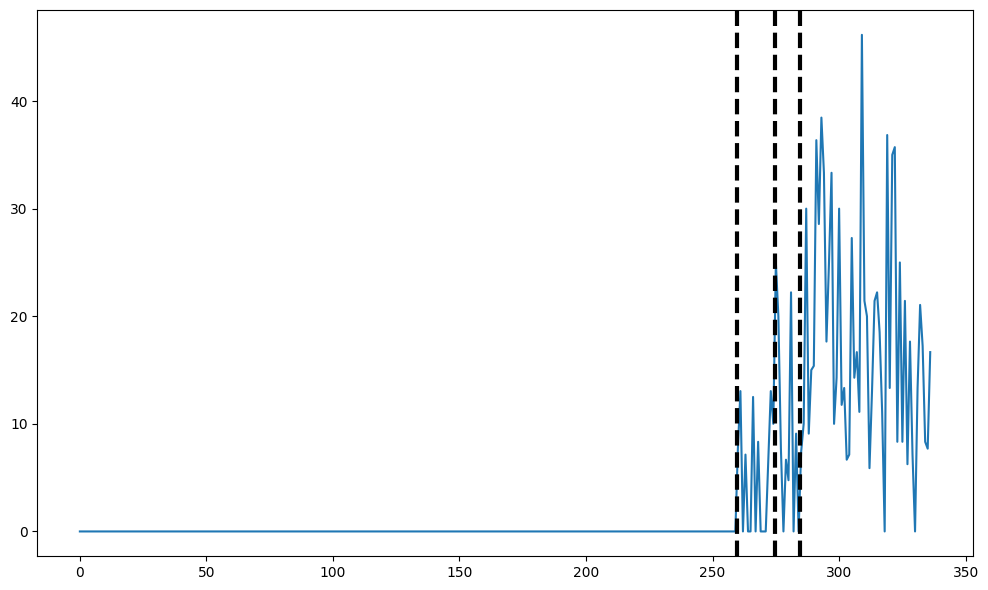

In [ ]:
signal = wide[['pct_1']].to_numpy()
dates = wide[['period']].to_numpy()
algo = rpt.Pelt(model='rank', min_size=0, jump=5).fit(signal)
my_bkps = algo.predict(
    # n_bkps=,
    pen= 1
    )
rpt.show.display(signal, [], my_bkps, figsize=(10, 6))
plt.show()

C:\Users\povhi\AppData\Local\Temp\ipykernel_42588\3057843147.py:102: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



      cost    algo  k          bic                            bkps
0  poisson    pelt  5 -3943.608814  [260, 275, 290, 295, 325, 337]
1  poisson  binseg  5 -3926.318550  [260, 275, 285, 290, 325, 337]
2     rank  binseg  2  -561.917170                 [260, 285, 337]
3     rank    pelt  2  -561.917170                 [260, 285, 337]
4      rbf  binseg  1   152.556105                      [260, 337]
5      rbf    pelt  1   152.556105                      [260, 337]


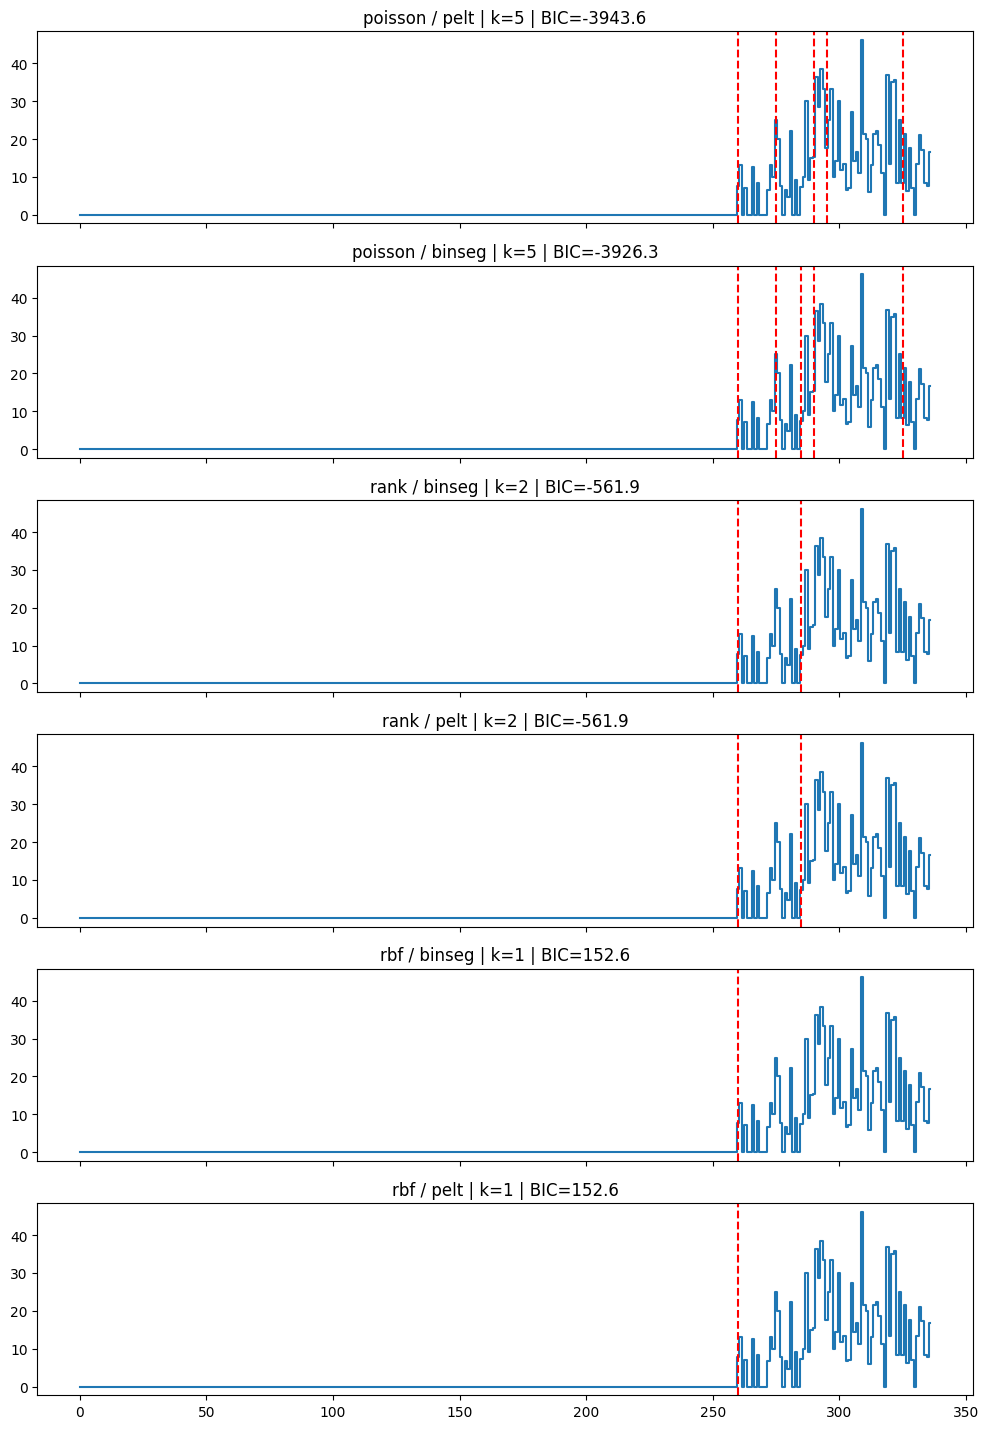

In [ ]:
"""
Changepoint grid-search + visual diagnostics (fixed NumPy‐format issue)
"""

# --------------------------------------------------------------------
# 0 · Imports
# --------------------------------------------------------------------
from math import log
import numpy as np
import pandas as pd
import ruptures as rpt
from ruptures.base import BaseCost
import matplotlib.pyplot as plt


# --------------------------------------------------------------------
# 1 · Custom Poisson cost
# --------------------------------------------------------------------
class CostPoisson(BaseCost):
    model = "poisson"
    min_size = 1

    def fit(self, signal):
        self.signal = np.asarray(signal, dtype=float).ravel()
        self.cum = np.concatenate([[0.0], self.signal.cumsum()])
        return self

    def error(self, start, end):
        seg_sum = self.cum[end] - self.cum[start]
        n = end - start
        if seg_sum == 0 or n == 0:
            return 0.0
        rate = seg_sum / n
        return -(seg_sum * log(rate) - n * rate)


# --------------------------------------------------------------------
# 2 · Helpers
# --------------------------------------------------------------------
def _bic(k, neg_ll, n):        # Schwarz criterion
    return 2 * neg_ll + k * log(n)


def _fit_algo(algo, cost, y):
    if algo == "binseg":
        return (rpt.Binseg(model=cost).fit(y)
                if isinstance(cost, str)
                else rpt.Binseg(model="custom", custom_cost=cost).fit(y))
    if algo == "pelt":
        return (rpt.Pelt(model=cost).fit(y)
                if isinstance(cost, str)
                else rpt.Pelt(model="custom", custom_cost=cost).fit(y))
    raise ValueError(algo)


def _segment_binseg(y, cost, max_bkps):
    algo = _fit_algo("binseg", cost, y)
    best_bic, best_k, best_bkps = np.inf, None, None
    for k in range(1, max_bkps + 1):
        bkps = algo.predict(n_bkps=k)
        nll = (algo.cost.sum_of_costs(bkps) if isinstance(cost, str)
               else sum(cost.error(s, e) for s, e in zip([0] + bkps[:-1], bkps)))
        bic = _bic(k, nll, len(y))
        if bic < best_bic:
            best_bic, best_k, best_bkps = bic, k, bkps
    return best_bic, best_k, best_bkps


def _segment_pelt(y, cost, pen):
    algo = _fit_algo("pelt", cost, y)
    bkps = algo.predict(pen=pen)
    k = len(bkps) - 1
    nll = (algo.cost.sum_of_costs(bkps) if isinstance(cost, str)
           else sum(cost.error(s, e) for s, e in zip([0] + bkps[:-1], bkps)))
    bic = _bic(k, nll, len(y))
    return bic, k, bkps


# --------------------------------------------------------------------
# 3 · Main entry point
# --------------------------------------------------------------------
def evaluate_all(y,
                 max_breaks=5,
                 costs=("poisson", "rank", "rbf"),
                 algos=("binseg", "pelt"),
                 pen=None,
                 plot=True):
    y = np.asarray(y, dtype=float).ravel()
    pen = pen or np.log(len(y))
    rows = []

    for cost_name in costs:
        cost_obj = CostPoisson() if cost_name == "poisson" else cost_name
        for algo_name in algos:
            if algo_name == "binseg":
                bic, k, bkps = _segment_binseg(y, cost_obj, max_breaks)
            else: 
                bic, k, bkps = _segment_pelt(y, cost_obj, pen)
            rows.append(dict(cost=cost_name,
                             algo=algo_name,
                             k=int(k),            
                             bic=float(bic),      
                             bkps=bkps))

    df = pd.DataFrame(rows).sort_values("bic").reset_index(drop=True)

    if plot:
        n = len(df)
        fig, axes = plt.subplots(n, 1, figsize=(10, 2.4 * n), sharex=True)
        axes = np.atleast_1d(axes)
        x = np.arange(len(y))
        for ax, (_, row) in zip(axes, df.iterrows()):
            ax.step(x, y, where="mid")
            for b in row.bkps[:-1]:
                ax.axvline(b, color="red", ls="--")
            # ★ row.bic is now a float, so {:.1f} is safe
            ax.set_title(f"{row.cost} / {row.algo} | k={row.k} | BIC={row.bic:.1f}")
        fig.tight_layout()

    return df

In [3]:
res = evaluate_all(signal)
print(res)


NameError: name 'evaluate_all' is not defined

c:\Users\povhi\anaconda3\envs\ip\Lib\site-packages\indsl\equipment\volume_vessel.py:32: IndslUserWarning: Couldn't import fluids.numba_vectorized: No module named 'fluids'. Default to import fluids.vectorized.
  warnings.warn(


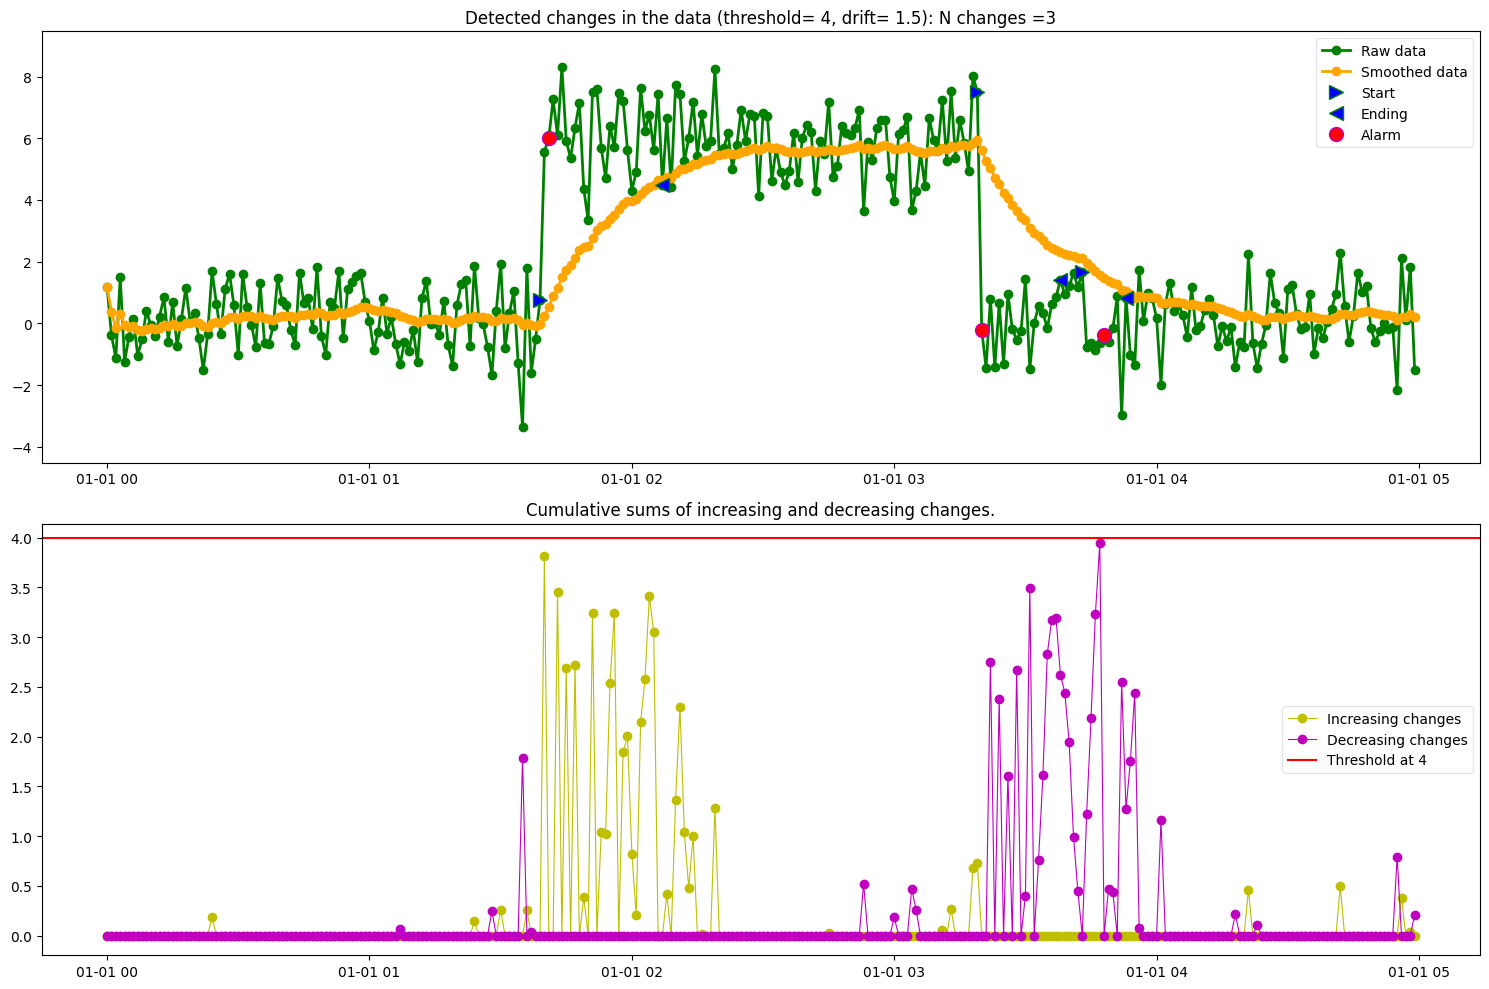

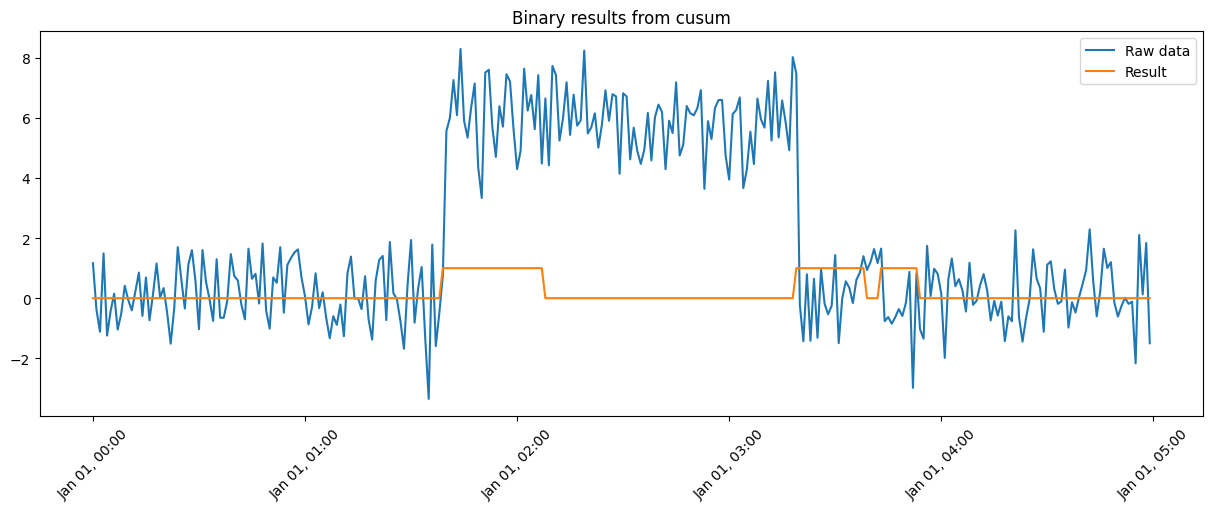

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from matplotlib.dates import DateFormatter

from indsl.detect.cusum import Cusum


# generate synthetic data with shift
y = np.random.randn(300)
y[100:200] += 6
index = pd.date_range(start="1970", periods=300, freq="1min")
raw_data = pd.Series(y, index=index)

# get cusum results and plot the intermidiate figures
res = Cusum(raw_data, threshold=4, drift=1.5, detect="both", predict_ending=True).cusum(plot_cusum=True)

# Plot the raw data and the resulting binary pd.Series returned from the cusum
fig, ax = plt.subplots(1, 1, figsize=[15, 5])
ax.plot(raw_data, label="Raw data")
ax.plot(res, label="Result")
ax.set_title("Binary results from cusum")
_ = ax.legend(loc="best")
# Formatting
myFmt = DateFormatter("%b %d, %H:%M")
ax.xaxis.set_major_formatter(myFmt)
ax.xaxis.set_major_formatter(DateFormatter("%b %d, %H:%M"))
_ = plt.setp(ax.get_xticklabels(), rotation=45)